## Given a Bank customer, we need to build a classifier which can determine whether they will leave or not using Neural networks

## The points distribution for this case is as follows:
1. Read the dataset in a new python notebook.
2. Drop the columns which are unique for all users like IDs (2.5 points)
3. Distinguish the feature and target set (2.5 points)
4. Divide the data set into Train and test sets
5. Normalize the train and test data (2.5 points)
6. Initialize &amp; build the model (10 points)
7. Optimize the model (5 points)
9. Predict the results using 0.5 as a threshold (5 points)
10. Print the Accuracy score and confusion matrix (2.5 points)

#### importing neccessary laibraries

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
tf.__version__

'2.0.0'

> + Using the latest version of tensorflow

#### Reading csv file using pandas 

In [3]:
df = pd.read_csv("Bank.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Checking all coloumns name 
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# distribution of target class can be understood
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

>- Baised data or we may say unblance data is present 

#### Looking first five rows of our csv file. 

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


> + **We can drop `RowNumber`, `CustomerId` and `Surname` columns as they are not required to classification of customer.**

### Let's drop `RowNumber`, `CustomerId` and `Surname`

In [8]:
df_drop = df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
print ('Shape of dataset',df_drop.shape)

Shape of dataset (10000, 11)


In [10]:
df_drop.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Let's look for datatype and other information for our data

In [11]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Looking for whether NaN and null values present in dataset. 

In [12]:
df_drop.isna().sum().sum()

0

In [13]:
df_drop.isnull().sum().sum()

0

> + There are no NaN or Null value present in our dataset.

## Selecting dependent(Input) and independent(Target) variable

In [14]:
X = df_drop.drop(columns=['Exited'],axis=1)
y = df_drop['Exited']

## Encoding categorical columns into numerical with one hot encoding technique.

In [15]:
# Get dummies
X = pd.get_dummies(X, prefix_sep='_',drop_first=True) 
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


> + Get Dummies converts all categorical columns to numerical with one hot encoding technique.
> + `drop_first = true` will automatically drops first columns of converted rows.

In [16]:
X.shape

(10000, 11)

### converterting target variable into numpy array

In [17]:
y = np.array(y)

In [18]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

### Let's divide the data set into Train and test sets.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [20]:
print ('shape of X_train',X_train.shape)
print ('shape of X_test',X_test.shape)
print ('shape of y_train',y_train.shape)
print ('shape of y_test',y_test.shape)

shape of X_train (8000, 11)
shape of X_test (2000, 11)
shape of y_train (8000,)
shape of y_test (2000,)


> - Normalize the train and test data (2.5 points)
> - Initialize & build the model (10 points)
> - Optimize the model (5 points)
> - Predict the results using 0.5 as a threshold (5 points)
> - Print the Accuracy score and confusion matrix (2.5 points)

In [21]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

# Creating Neural Network Model

In [22]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam

In [23]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

### Initialize Sequential model

In [24]:
model = tf.keras.models.Sequential() # Instantiating keras sequential models from keras 

### First layer (input layer)

In [25]:
#Add first fully connected layer
model.add(tf.keras.layers.Dense(200,                                      # Number of Neurons
                                input_dim=11,
                                activation='relu'))

#Add second fully connected layer
model.add(tf.keras.layers.Dense(100,                                      # Number of Neurons
                                activation='relu'))

#Add third fully connected layer
model.add(tf.keras.layers.Dense(50,                                      # Number of Neurons
                                activation='relu'))

#Add fourth fully connected layer
model.add(tf.keras.layers.Dense(25,                                      # Number of Neurons
                                activation='relu'))

In [26]:
# Final layer with activation function as softmax and 10 neurons 
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

> + `activiation: sigmoid` becasue we are in an output layer. We will use the Sigmoid activation function for  ϕ. 
> + This is used instead of the ReLu function becasue it generates probabilities for the outcome.
> + We want the probability that each customer leaves the bank.

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# fiting our model with 10 epochs 
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=10,
          batch_size=32)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 288us/sample - loss: 0.5038 - accuracy: 0.7999 - val_loss: 0.5243 - val_accuracy: 0.7820
Epoch 2/10
8000/8000 [==============================] - 1s 120us/sample - loss: 0.4955 - accuracy: 0.7999 - val_loss: 0.5222 - val_accuracy: 0.7820
Epoch 3/10
8000/8000 [==============================] - 2s 213us/sample - loss: 0.4959 - accuracy: 0.7999 - val_loss: 0.5247 - val_accuracy: 0.7820
Epoch 4/10
8000/8000 [==============================] - 2s 205us/sample - loss: 0.4959 - accuracy: 0.7999 - val_loss: 0.5201 - val_accuracy: 0.7820
Epoch 5/10
8000/8000 [==============================] - 1s 121us/sample - loss: 0.4950 - accuracy: 0.7999 - val_loss: 0.5236 - val_accuracy: 0.7820
Epoch 6/10
8000/8000 [==============================] - 2s 195us/sample - loss: 0.4951 - accuracy: 0.7999 - val_loss: 0.5224 - val_accuracy: 0.7820
Epoch 7/10
8000/8000 [==============================] - 1s 115us

In [29]:
# Predicting 
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

In [30]:
# Ploting Confussion matrix 
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [31]:
print (cm) # All the points are predicted as coustomer will not leave the bank 

[[1564    0]
 [ 436    0]]


In [32]:
print ('Acurracy on test set is : ',accuracy_score(y_test,y_pred))

Acurracy on test set is :  0.782


In [33]:
model.predict_proba(X_test, verbose=0)

array([[0.22290605],
       [0.2196391 ],
       [0.22209632],
       ...,
       [0.12254339],
       [0.1212869 ],
       [0.12136376]], dtype=float32)

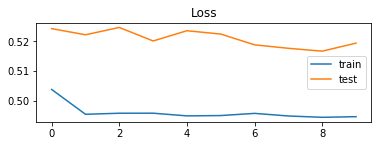

In [36]:
import matplotlib.pyplot as plt

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='test')
plt.legend()

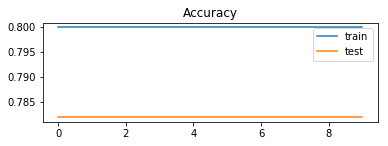

In [37]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(model.history.history['accuracy'], label='train')
plt.plot(model.history.history['val_accuracy'], label='test')
plt.legend()
plt.show()